In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
dir = '/content/gdrive/My Drive/Dataset Titanic'

In [8]:
sns.set_theme(style='whitegrid')

df = pd.read_csv(dir + '/Titanic-Dataset.csv')

# **Summary and Categorical Feature Statistics**

In [9]:
print("Numeric summary:")
display(df.describe().T)

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
# Categorical features
print("\nCategorical summary:")
display(df.select_dtypes(include='object').describe().T)


Categorical summary:


,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


# **Missing Values Visualization with Heat Map**

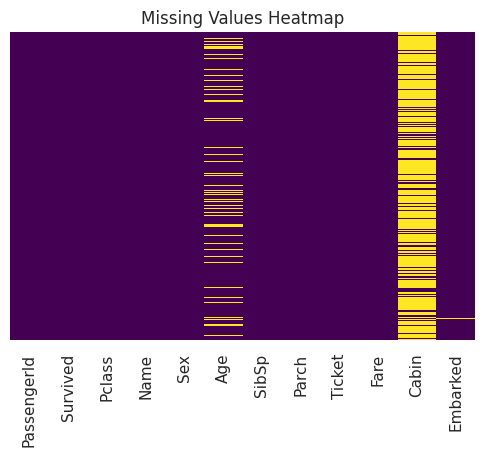

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# **Univariate Analysis**

**Histogram**

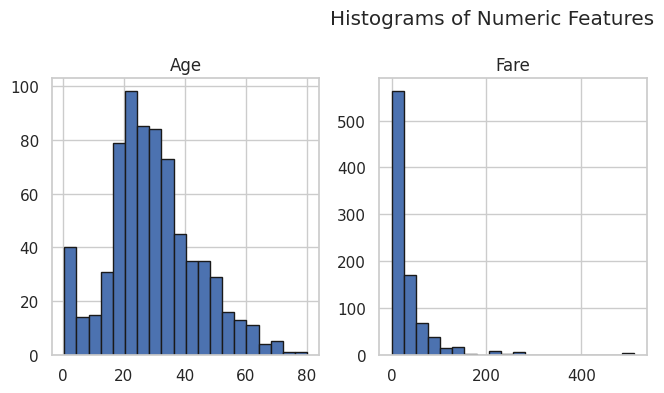

In [14]:
num_cols = ['Age','Fare','Embarked']

# Histograms
df[num_cols].hist(bins=20, figsize=(10,4), layout=(1,3), edgecolor='k')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

**Box Plots**

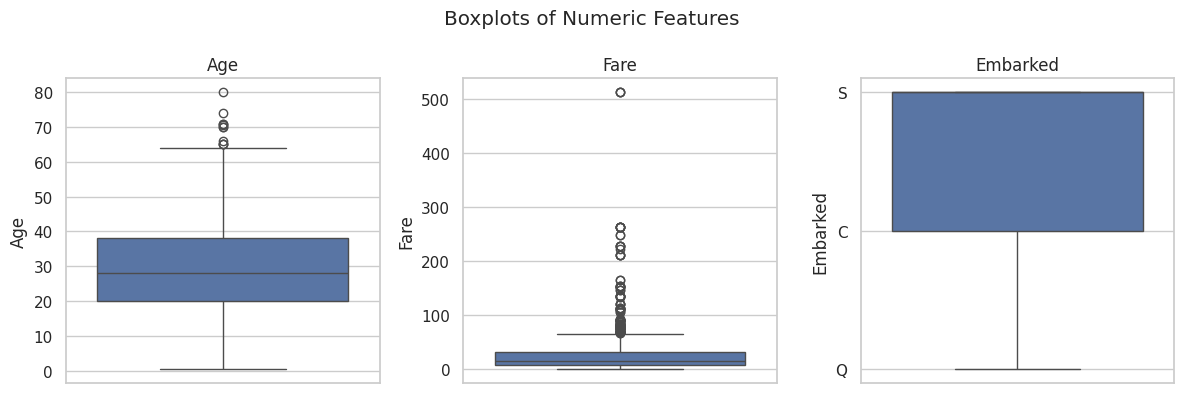

In [15]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, col in zip(axes, num_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)
plt.suptitle('Boxplots of Numeric Features')
plt.tight_layout()
plt.show()

**Countplots for key categoricals**

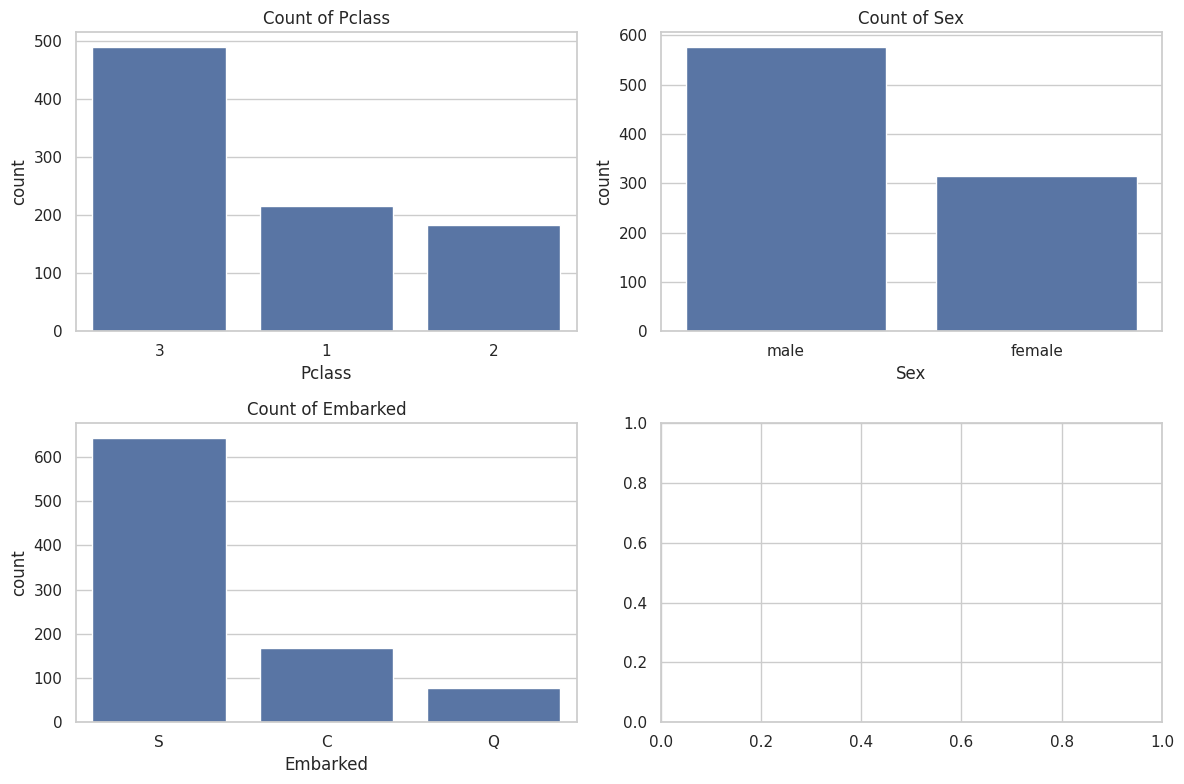

In [18]:
cat_cols = ['Pclass','Sex','Embarked']
fig, axes = plt.subplots(2,2, figsize=(12,8))

for ax, col in zip(axes.flat, cat_cols):
    # use value_counts to get a clean, non-mixed-type index
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, ax=ax)
    ax.set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

# **Bivariate Analysis**

**Pairplot**

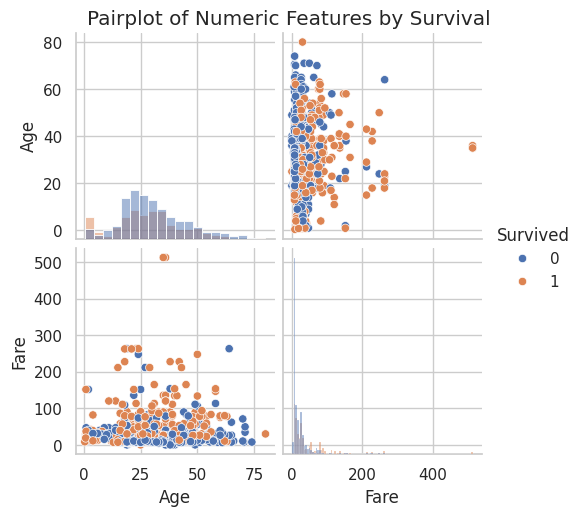

In [19]:
# 4a. Pairplot (colored by Survived)
sns.pairplot(df[num_cols + ['Survived']], hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Numeric Features by Survival', y=1.02)
plt.show()

# **Patterns -> Age Distribution**

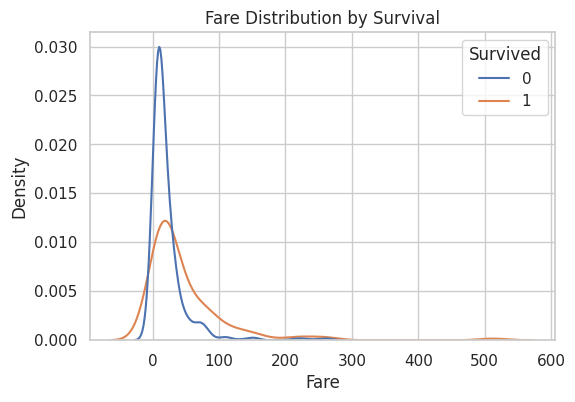

In [23]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Fare', hue='Survived', common_norm=False)
plt.title('Fare Distribution by Survival')
plt.show()